In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


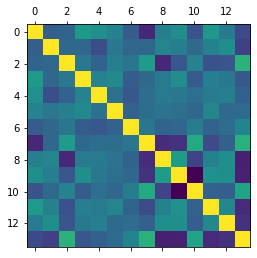

In [4]:
plt.matshow(df.corr())
plt.show()

In [5]:
x_df = df.iloc[:,:-1]

In [6]:
y_df = df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.1,random_state=42)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
y_train

284    0
198    0
42     1
17     1
168    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 272, dtype: int64

In [10]:
model = Sequential()
model.add(Dense(130,activation='relu',kernel_regularizer=l2(0.001),input_shape=[13]))
model.add(Dense(65,activation='selu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(13,activation='selu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               1820      
_________________________________________________________________
dense_1 (Dense)              (None, 65)                8515      
_________________________________________________________________
dropout (Dropout)            (None, 65)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                858       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 11,207
Trainable params: 11,207
Non-trainable params: 0
____________________________________________________

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 33ms/step - loss: 0.7623 - accuracy: 0.6284 - val_loss: 0.6218 - val_accuracy: 0.8387
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.8039 - val_loss: 0.6294 - val_accuracy: 0.8065
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.8561 - val_loss: 0.6509 - val_accuracy: 0.8387
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8573 - val_loss: 0.6536 - val_accuracy: 0.8387
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.8491 - val_loss: 0.6627 - val_accuracy: 0.8065
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8601 - val_loss: 0.6695 - val_accuracy: 0.8065
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8702 - val_loss: 0.6681 - val_accuracy: 0.8065
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9965 - val_loss: 1.7610 - val_accuracy: 0.8065
Epoch 60/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9962 - val_loss: 1.7685 - val_accuracy: 0.8065
Epoch 61/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9955 - val_loss: 1.7878 - val_accuracy: 0.8065
Epoch 62/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9847 - val_loss: 1.7948 - val_accuracy: 0.8065
Epoch 63/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.9943 - val_loss: 1.7947 - val_accuracy: 0.8065
Epoch 64/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9984 - val_loss: 1.8335 - val_accuracy: 0.8065
Epoch 65/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9989 - val_loss: 1.8274 - val_accuracy: 0.7742
Epoch 66/100
9/9 [===============

Text(0.5, 1.0, 'Loss')

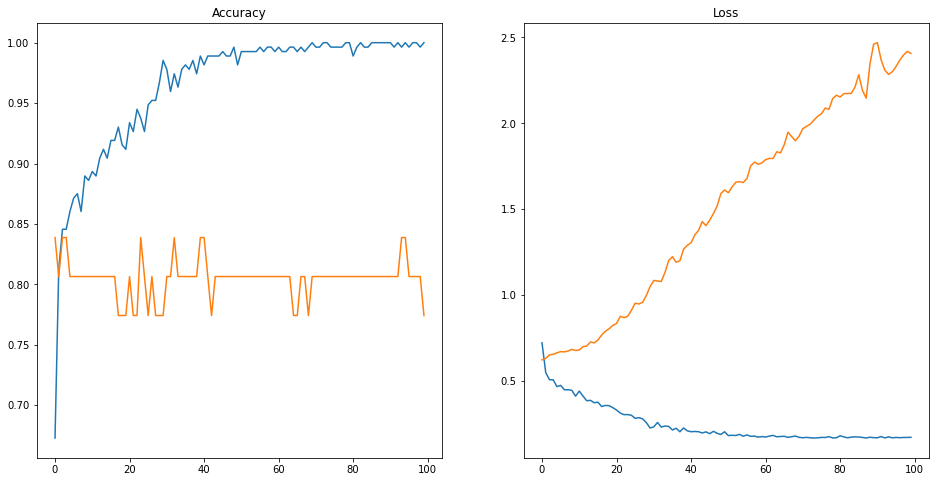

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.title('Loss')


In [15]:
y_pred = model.predict(X_test)


In [16]:
y_pred

array([[1.4517953e-05],
       [1.7649240e-03],
       [1.0000000e+00],
       [5.4208414e-07],
       [9.9995720e-01],
       [9.9999094e-01],
       [9.9671930e-01],
       [1.7174532e-18],
       [1.5698303e-08],
       [4.1138574e-01],
       [9.9987578e-01],
       [2.1182403e-11],
       [9.9944562e-01],
       [1.0140778e-06],
       [9.9999821e-01],
       [9.9999893e-01],
       [1.0000000e+00],
       [6.0177740e-08],
       [2.9888276e-11],
       [1.1814765e-08],
       [4.1671819e-03],
       [1.3025767e-09],
       [1.6551872e-01],
       [9.9909246e-01],
       [9.9999809e-01],
       [9.9999106e-01],
       [9.9956471e-01],
       [2.1432878e-01],
       [8.3445562e-10],
       [9.9695134e-01],
       [2.5229722e-08]], dtype=float32)

In [17]:
y_pred = (y_pred > 0.5)

In [18]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False]])

In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]]


In [ ]:
type(y_test)